# **16S rRNA Gene Sequence and Phylogenetic Analysis of Vibrio isolates using Biopython Library**
# A study case from a Shrimp Pond in Patrol, Indramayu, West Java, Indonesia 
**By Harish Muhammad**

## **Context**

### **Background**
Shrimp aquaculture is a vital contributor to global seafood production, supporting livelihoods and economies worldwide. However, the industry is highly vulnerable to disease outbreaks, with vibriosis being one of the most devastating bacterial infections affecting shrimp. Vibriosis is caused by species of the genus Vibrio, and outbreaks can result in mortality rates exceeding 70% in affected ponds, significantly impacting production and leading to economic losses estimated at billions of USD annually (De Schryver et al., 2014; Soto-Rodriguez et al., 2015). Pathogenic Vibrio species such as Vibrio harveyi, Vibrio parahaemolyticus, Vibrio alginolyticus, and Vibrio vulnificus are commonly associated with shrimp diseases, causing symptoms ranging from septicemia and luminescent bacterial disease to slow growth and death. 

Indonesia, a major player in global shrimp aquaculture. The north coast of Java, particularly Indramayu, is a crucial hub for shrimp aquaculture in Indonesia.  Shrimp ponds in this area are vital for local and national economies, yet they are highly susceptible to vibriosis outbreaks due to the prevalence of Vibrio species in the aquatic environment. Understanding the composition and diversity of Vibrio populations in these ecosystems is essential for the development of effective disease management strategies. 

One powerful approach for identifying bacterial species and understanding their evolutionary relationships is the analysis of the 16S ribosomal RNA (rRNA) gene. This gene is a highly conserved molecular marker that provides taxonomic and phylogenetic insights into bacterial communities. By sequencing the 16S rRNA gene, researchers can distinguish pathogenic Vibrio species and study their relationships, which is essential for developing biosecurity measures and disease prevention programs in aquaculture.

In this study, bioinformatic analysis was performed on the 16S rRNA sequences of Vibrio isolates collected from shrimp ponds in Patrol, Indramayu, West Java. Furthermore, the Biopython library was employed to help the analysis by supporting biological computation, facilitating tasks such as sequence alignment, data parsing, and phylogenetic tree construction.

### **The Objective of the Analysis** 

**Molecular identification**:
* To analyze the identity of Vibrio isolates through 16S rRNA gene sequencing and BLAST analysis with Biopython library

**Phylogenetic tree relationship**: 
* To construct phylogenetic tree and analysis using Biopython library and BioPhylo Module and to elucidate the relationship of isolate with other vibrio species.

**Pathogenic potential in Aquaculture**: 
* To investigate the potential pathogenicity of the isolates by analyzing their association with pathogenic Vibrio species (e.g., Vibrio rotiferianus, Vibrio harveyi, Vibrio owensii) 


## **Sample collection, Vibrio's DNA Isolation, and Sequencing**

### **Sampling Location**
The study was conducted on pond water from a shrimp farm, located in the north coastal area of Java, in Patrol district, Indramayu, West Java, Indonesia.

In [1]:
# Creating a geo-map of sampling location using Folium library

import folium

# Create a map centered on sampling location 
map_center = [-6.2882, 108.0041]  # the coordinate
mymap = folium.Map(location=map_center, zoom_start=15) # resolution

# Define the corrected coordinates for the location
locations = {
    'Sampling location': [-6.287861, 108.000086],  # E6 location
}

# Add markers to the map
for location, coords in locations.items():
    folium.Marker(
        location=coords,
        popup=f"{location} - Latitude: {coords[0]}, Longitude: {coords[1]}",
        icon=folium.Icon(color='blue', icon='info-sign')
    ).add_to(mymap)

# Display the map
mymap


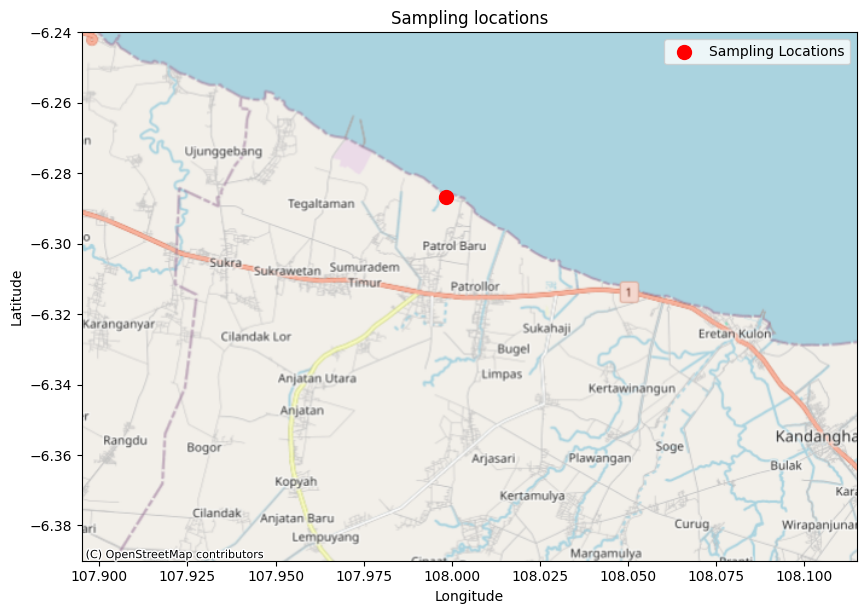

In [2]:
# Creating map for sampling location using geopandas library
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point
import contextily as ctx

# Define the coordinates for the location
locations = {
    'Location': [
        ' '
    ],
    'Latitude': [
        -6.2868  # PT Indonusa locations
    ],
    'Longitude': [
        107.9984  # PT Indonusa locations
    ]
}

# Convert the coordinates into a GeoDataFrame
geometry = [Point(xy) for xy in zip(locations['Longitude'], locations['Latitude'])]
gdf = gpd.GeoDataFrame(locations, geometry=geometry)
gdf.crs = "EPSG:4326"  # Set coordinate system to WGS84

# Plot the map
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the locations
gdf.plot(ax=ax, color='red', markersize=100, label="Sampling Locations")

# Annotate each location
for x, y, label in zip(gdf.geometry.x, gdf.geometry.y, gdf['Location']):
    ax.text(x, y, label, fontsize=9, ha='right', color='darkred')

# Approximate 100 km zoom out: Adjust limits by ~1 degree in latitude and longitude
plt.xlim(107.895, 108.115)  # Longitude range, 100 km roughly corresponds to 1 degree
plt.ylim(-6.39, -6.24)  # Latitude range, 100 km roughly corresponds to 1 degree

# Add basemap for context
ctx.add_basemap(ax, crs=gdf.crs.to_string(), source=ctx.providers.OpenStreetMap.Mapnik)

# Titles and labels
plt.title("Sampling locations")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend()

plt.show()


### **Sample Collection and Isolation**

Water samples were collected from shrimp ponds and placed into sterile containers. The containers stored in a cool box to maintain sample integrity, and transported to the laboratory at the Bandung Institute of Technology. All samples were processed within 24 hours to ensure reliable microbial recovery.


### **Vibrio Bacteria Isolation**

In the laboratory, water samples were spread onto Thiosulfate Citrate Bile Salt Sucrose (TCBS) agar, a selective medium designed for isolating Vibrio species. The plates were incubated at 28°C for 24 hours, similar to the shrimp pond environment. After incubation, distinct colonies were examined for morphological characteristics, and representative colonies were selected for further analysis.
In this study, there were two distinct colonies that consistent to be present during overall sampling period. The two grown colonies in the TCBS were hypothesized as Vibrio isolates, but we will verify the identity on the next steps.  

To be more practical, these two isolates will be mentioned later as
1. First Isolate: **Isolate Indramayu 1**
2. Second Isolate: **Isolate Indramayu 2**

### **DNA Extraction, Amplification, and Verification**
DNA was extracted from the isolated bacterial colonies using a standard extraction kit (a PCR Ready-to-Go kit), following the manufacturer’s instructions. The extracted DNA was then amplified by targeting the 16S rRNA gene, a well-conserved region suitable for bacterial identification, using universal primers. The amplification was performed with polymerase chain reaction (PCR) under optimized conditions, ensuring the production of high-quality DNA fragments. Verification of successful amplification was confirmed through agarose gel electrophoresis, where the expected 1,500-1600 base-pair (bp) bands were visualized under UV light.

### **Purification and DNA Sequencing/Sequence Characterization**
Following amplification, the PCR products were purified to remove excess primers and contaminants that might interfere with sequencing. The purified DNA was sent to Macrogen Inc., Korea, for sequencing, where the Sanger method was applied to obtain high-quality reads of the 16S rRNA gene sequence for each isolate. 


### **Bioinformatic Analysis**

All bioinformatic analysis was conducted using biopython library and modules. The biopython library facilitates bioinformatic analyses and provides robust tools for interacting with biological databases, manipulating sequences, and automating bioinformatics workflows. The library also contains modules to use BLAST (Basic Local Alignment Search Tool), conduct multiple alignment, distance matrix calculation, and phylogenetic tree construction and visualization (Cock et.al, 2009).

## **Isolate sequence analysis using Biopython library and BLAST**

This steps mainly started from preprocessing the sequence files into working FASTA format and conducting analysis using BLAST.

### **Sequence pre-processing**

The contig files (containing raw 16S rRNA sequence) obtained from previous sequencing process were further analyzed using the Biopython SeqIO module. The contig files were read and converted into FASTA format for further sequence handling. 

**Importing library and directory preparation**

In [3]:
# Import library
from Bio import Align
from Bio import SeqIO

from Bio import SeqIO
from Bio.Blast import NCBIWWW
from Bio.Blast import NCBIXML

# Import library data manipulation
import pandas as pd

# Import regex for filtering
import re


In [4]:
# Checking the directory
import os
print(os.listdir('C:/Users/Lenovo/Documents/1. Bioinformatics/GS - Data/Biopython_analysis'))

['.ipynb_checkpoints', '1. The Phylogenetic tree of first isolate.PNG', '2. The Phylogenetic tree of second isolate.PNG', 'aligned_sequences_TB02_contig.fasta', 'aligned_sequences_TB03_contig.fasta', 'blast_output_raw.xml', 'converted_multi_sequences_TB02_contig.fasta', 'converted_multi_sequences_TB03_contig.fasta', 'folium geo map.PNG', 'geo panda map.PNG', 'improved_phylogenetic_tree.png', 'Literatur', 'luminous vibriosis.PNG', 'MegaBlast_isolat_1_indramayu.PNG', 'MegaBlast_isolat_2_indramayu.PNG', 'multi_sequences_TB02_contig.aln', 'multi_sequences_TB02_contig.dnd', 'multi_sequences_TB02_contig.fasta', 'multi_sequences_TB02_contig_with_species.dnd', 'multi_sequences_TB02_contig_with_species.fasta', 'multi_sequences_TB03_contig.aln', 'multi_sequences_TB03_contig.fasta', 'multi_sequences_TB03_contig_with_species.dnd', 'multi_sequences_TB03_contig_with_species.fasta', 'phylogenetic_tree.png', 'Pond Bacterial Sequence Analysis - almost almost done.ipynb', 'Pond Bacterial Sequence Analys

In [5]:
# Preprocessing the contig files into FASTA 

# Read contigs
# First contig read
first_contig = list(SeqIO.parse("TB02_contig_1.contigs", "fasta"))

# Second contig read
second_contig = list(SeqIO.parse("TB03_contig_1.contigs", "fasta"))

# Access the first record of each contig file
if first_contig:
    print(f"Contig ID: {first_contig[0].id}")
    print(f"Sequence: {first_contig[0].seq[:100]}")  # Print the first 100 bases
else:
    print("No sequences found in TB02_contig_1.contigs")

print('---')

if second_contig:
    print(f"Contig ID: {second_contig[0].id}")
    print(f"Sequence: {second_contig[0].seq[:100]}")  # Print the first 100 bases
else:
    print("No sequences found in TB03_contig_1.contigs")

Contig ID: TB02_contig_1
Sequence: CTCGCTCAGATTGAACGCTGGCGGCAGGCCTAACACATGCAAGTCGAGCGGAAACGAGTTATCTGAACCTTCGGGGAACGATAACGGCGTCGAGCGGCGG
---
Contig ID: TB03_contig_1
Sequence: CGTTTTTATTTTTTTTTTTTTTTTTTATTCTCGATGACGCTGGCGGCAGGCCTAACACATGCAAGTCGAGCGGAAACGAGTTATCTGAACCTTCGGGGGA


### **BLAST Analysis with Biopython**

After the sequences were pre-processed, Biopython's BLAST (MEGABLAST) interface was used to align it against the NCBI nucleotide database to identify the bacterial species. A function for running MEGABLAST was created to facilitate the work. MEGABLAST setting was preferred than the usual BLASTN as we wanted to find highly similar matches to identify closely related sequences.

The sequence was submitted to MEGABLAST, and the resulting alignment scores, query coverage, e-values, and match percent identity were retrieved for comparison. These parameters were used to provide insight into the closest known sequences in the NCBI database, helping to confirm the bacterial identity by matching sequence with similar sequences already cataloged in the NCBI database. Furthermore, An additional constraint, maximum alignment length (1600 bp), was inputed into query to make sure the BLAST's results contained only 16S rRNA gene sequence.

**BLAST Analysis against NCBI Database**

In [6]:
# Function for running MEGABLAST

def run_megablast(sequence, seq_id, max_alignment_length=1600):
    """
    Run MegaBLAST for a given sequence with specific parameters.

    Parameters:
        sequence (str): The DNA sequence to query.
        seq_id (str): Identifier for the sequence.
        max_alignment_length (int): Maximum alignment length to include in results.
        
    Returns:
        pd.DataFrame: BLAST results filtered by alignment length and modified Description column.
    """
    print(f"Running MegaBLAST for {seq_id}...")
    
    # Run MegaBLAST using qblast
    result_handle = NCBIWWW.qblast(
        program="blastn",
        database="nt",  # Nucleotide database
        sequence=sequence,
        megablast=True,  # Enable MegaBLAST
        #entrez_query="16S"  # Restrict to 16S rRNA sequences
    )
    
    # Parse BLAST results
    blast_records = NCBIXML.parse(result_handle)
    results = []
    
    for record in blast_records:
        for alignment in record.alignments:
            for hsp in alignment.hsps:
                # Check alignment length constraint
                if alignment.length <= max_alignment_length:
                    query_cover = (hsp.align_length / record.query_length) * 100
                    
                    # Modify the description to extract species name and text after
                    match = re.search(r'(?<=\| )[^|]+', alignment.title)
                    description = match.group(0) if match else alignment.title
                    
                    results.append({
                        "Description": description,
                        "Max Score": hsp.score,
                        "Total Score": hsp.align_length,
                        "Query Cover": f"{query_cover:.2f}%",
                        "E-value": hsp.expect,
                        "Per. Ident": f"{(hsp.identities / hsp.align_length) * 100:.2f}%",
                        "Acc. Len": alignment.length,
                        "Accession": alignment.accession,
                    })
    # Convert to DataFrame
    if results:
        df = pd.DataFrame(results)
        print(f"Retrieved {len(df)} results for {seq_id}.")
    else:
        print(f"No results found for {seq_id}.")
        df = pd.DataFrame()
    
    return df



### **Running BLAST (First Isolate)**

In [7]:
# Running MEGABLAST for the first contig
df1_results = run_megablast(first_contig[0].seq, first_contig[0].id, max_alignment_length=1600)

# Displaying result
display(df1_results)

Running MegaBLAST for TB02_contig_1...
Retrieved 16 results for TB02_contig_1.


,Description,Max Score,Total Score,Query Cover,E-value,Per. Ident,Acc. Len,Accession
0,"Vibrio sp. YASM14 16S ribosomal RNA gene, part...",1487.0,1490,100.00%,0.0,99.93%,1514,DQ314529
1,Uncultured bacterium clone 8M39 16S ribosomal ...,1484.0,1490,100.00%,0.0,99.87%,1514,JF272036
2,Vibrio rotiferianus strain 32BCA 16S ribosomal...,1483.0,1486,99.73%,0.0,99.93%,1502,MK874920
3,Vibrio rotiferianus strain WCM6 16S ribosomal ...,1483.0,1487,99.80%,0.0,99.93%,1488,PQ524991
4,Vibrio rotiferianus strain CUVET 16S ribosomal...,1481.0,1487,99.80%,0.0,99.87%,1497,ON159303
5,"Vibrio sp. YASM15 16S ribosomal RNA gene, part...",1481.0,1490,100.00%,0.0,99.80%,1514,DQ314530
6,"Vibrio rotiferianus partial 16S rRNA gene, iso...",1481.0,1487,99.80%,0.0,99.87%,1549,LR861576
7,"Vibrio sp. OIMK4 16S ribosomal RNA gene, parti...",1478.0,1487,99.80%,0.0,99.80%,1519,DQ317681
8,Uncultured bacterium clone YZ20 16S ribosomal ...,1478.0,1490,100.00%,0.0,99.73%,1514,KJ457338
9,Vibrio campbellii strain XTF-18 16S ribosomal ...,1478.0,1487,99.80%,0.0,99.80%,1549,OP835965


### **BLAST Result and Insights (First Isolate)**

**Insights - MEGABLAST result (First isolate)**

Based on the MEGABLAST results from the first isolate sequence, isolate shows very high similarity to multiple Vibrio species. We could point out some insights:


**Percent Identity, Coverage and E-Value of overall Result**
* **High identity percentages (99.66% to 99.93%)** indicated that the query sequence was highly similar to the matched sequences.
* **Query cover of nearly 100%** suggested that the entire input sequence aligned with the matched sequences, making the results reliable.
* **E-value of 0.0** implied the result occuring by random chance was extremely low.

**Top Matches**
* The highest scoring of MEGABLAST matches suggest that the sequence is closely related to species including **Vibrio sp. YASM14** (99.93% percent identity and full query coverage) and **Vibrio rotiferianus strain 32BCA** (99.93% percent identity and 99.73% query coverage)
* Some hits were labeled as "Uncultured" (e.g., Uncultured bacterium clone 8M39), indicating sequences derived from environmental samples. These results may represent environmental strains, possibly adapted to a specific habitat or host (in aquaculture ecology), closely related to cultured Vibrio species.
* Several other strains of Vibrio rotiferianus (e.g., WCM6, CUVET, etc.) also have high identity (99.87–99.93%) and query coverage (~99.8%), suggesting a close evolutionary relationship with this species.
* The similarity of the sequeces to multiple species (Vibrio sp., Vibrio rotiferianus, Vibrio campbellii) also raised the possibility of the sample being a **hybrid strain**.

**First Isolate Identity**
* Based on the sequence similarity, the highest-scoring match of Vibrio sp. YASM14, with 99.93% identity and full query coverage, may indicates that the isolate is most closely related to this species. However, Vibrio rotiferianus strains 32BCA also show near-identical sequences (99.93% identity) with slightly lower query coverage, which supports their close relationship.


### **Running BLAST (Second isolate)**

In [8]:
# Running MEGABLAST for the second isolate
df2_results = run_megablast(second_contig[0].seq, second_contig[0].id, max_alignment_length=1600)

# Displaying result
display(df2_results)

Running MegaBLAST for TB03_contig_1...
Retrieved 35 results for TB03_contig_1.


,Description,Max Score,Total Score,Query Cover,E-value,Per. Ident,Acc. Len,Accession
0,"Vibrio sp. MY-2008-U5 partial 16S rRNA gene, i...",1470.0,1470,97.61%,0.0,100.00%,1513,FM957464
1,Vibrio sp. strain WAB2255 16S ribosomal RNA ge...,1468.0,1470,97.61%,0.0,99.93%,1475,MH169314
2,"Vibrio sp. MY-2008-U27 partial 16S rRNA gene, ...",1467.0,1470,97.61%,0.0,99.93%,1513,FM957469
3,Vibrio owensii strain NBVo-Mr1 16S ribosomal R...,1467.0,1470,97.61%,0.0,99.93%,1517,OM988202
4,Uncultured gamma proteobacterium clone UA07 16...,1467.0,1470,97.61%,0.0,99.93%,1503,DQ269050
5,Vibrio sp. strain WAB2220 16S ribosomal RNA ge...,1465.0,1470,97.61%,0.0,99.86%,1475,MH169291
6,gi|8571418|gb|AF246980.1|AF246980 Vibrio sp. 9...,1465.0,1470,97.61%,0.0,99.86%,1505,AF246980
7,"Vibrio sp. strain HD-1 16S ribosomal RNA gene,...",1464.0,1470,97.61%,0.0,99.86%,1517,MH820372
8,"Vibrio owensii 16S rRNA gene, isolate AP55",1464.0,1470,97.61%,0.0,99.86%,1475,HE584790
9,"Vibrio sp. W-13 16S ribosomal RNA gene, partia...",1464.0,1467,97.41%,0.0,99.93%,1467,KC777293


### **BLAST Results and Insights (Second Isolate)**

**Insights - BLAST Results (Second Isolate)**

**Top Matches**
* The BLAST results for the second isolate primarily indicated matches with Vibrio species too.
* The highest-ranking match was **Vibrio sp. MY-2008-U5** with 100% identity, 97.61% query cover, and an E-value of 0.0.
* Some other entries (Vibrio sp. strain WAB2255, Vibrio owensii, Vibrio harveyi, etc.) highlight matches with multiple Vibrio species or strains, such as Vibrio owensii, Vibrio harveyi, and uncultured Vibrio species. This may indicate conserved regions in the 16S rRNA gene across these species, which makes differentiating between them more challenging.

**Percent Identity, Query Cover, and E-Value**
* Overall resuts have percent identity from 99.8 to 100%, which are exceptionally high or suggest strong similarity.
* Most results have a query cover of more than 97% indicates only a slight mismatch and still acceptable for identifying closely related species.
* The E-values for all results are 0.0, displaying a negligible probability of these matches occurring by random chance.

## **Phylogenetic Tree Construction and Visualization**
We conducted phylogenetic tree construction and visualization for the first isolat (Isolate Indramayu 1) and second isolate (Isolat Indramayu 2) separately. 
The phylogenetic analysis was performed to assess their evolutionary relationships with known Vibrio species sequences obtained from the NCBI database. For this purpose, the UPGMA (Unweighted Pair Group Method with Arithmetic Mean) algorithm was utilized, a method particularly suited for 16S rRNA gene-based analyses due to its reliance on pairwise genetic distances and the assumption of a constant molecular clock. The trees were constructed and visualized using the robust tools provided by the Biopython library's Phylo module. 

#### **Phylogenetic Tree Construction**

The steps for creating phylogenetic tree can be breakdown as: 

**Sequence collection and setting an outgrup**

* The phylogenetic tree construction began with identifying similar sequences from the NCBI database based on the previous step in MEGABLAST analysis. Sequences with high percent identity and very low e-values were selected and downloaded using Biopython's Entrez module. Additionally, an Escherichia coli 16S rRNA gene sequence was included as an outgroup to root the tree. All sequences, including the sequence of respective isolate and the downloaded reference sequences, were saved in FASTA format for alignment.

**Preprocessing: Multiple sequences alignment**
* The sequences were aligned using the ClustalW2 tool to ensure homologous regions were accurately compared. 

**Distance matrix calculation**
* From the aligned sequences, a genetic pairwise distance matrix was computed using Biopython's DistanceCalculator. This matrix quantified the genetic dissimilarity between sequences based on nucleotide differences.

**Clustering: UPGMA algorithm**
* The clustering process employed Biopython's DistanceTreeConstructor class, which uses the UPGMA algorithm to iteratively group sequences with the smallest genetic distances. UPGMA progressively merges the closest sequences into clusters, ultimately computing a rooted tree that reflects the evolutionary relationships among all included sequences.

**Additional settings: Mapping ID to species**
* The resulting phylogenetic tree was exported in Newick format, and the sequence labels were updated to display species names by mapping sequence IDs to corresponding species information. This labeling provided a clearer interpretation of the relationships depicted in the tree.

#### **Phylogenetic Tree Visualization**
* The finalized phylogenetic trees for both Vibrio isolates were visualized using Biopython's Phylo.draw() method. This visualization presented a rooted tree, with the common ancestor of all sequences positioned at the root.

All steps of phylogenetic tree construction and visualization mentioned before were conducted for the both isolat as below:  

### **First Isolate Phylogenetic Tree Construction & Visualization** 

**Importing libraries for Phylogenetic tree construction and visualization**

In [9]:
# Importing library for Phylogenetic tree construction

# Importing Biopython libraries
from Bio import Entrez # Interacts with NCBI's database to fetch genetic data
from Bio import SeqIO # Handles reading and writting sequence file formats (e.g, FASTA)
from Bio import AlignIO # Manages multiple sequence alignments file formats
from Bio import Phylo # Module for workint with phylogenetic tree

# Run external programs and processes directly from Python scripts
# Allow integration with ClustalW to perform multiple sequence alignment
import subprocess

# Importing library for tree visualization
from Bio.Phylo.TreeConstruction import DistanceCalculator # Calculates pairwise distances between aligned sequences based on specific models -  for constructing a distance matrix for phylogenetic tree construction
from Bio.Phylo.TreeConstruction import DistanceTreeConstructor # Constructs phylogenetic trees 
from io import StringIO # allows create an in-memory file object for storing 'new wick' file for tree visualization
from Bio.Phylo import draw, write # Provid additional features for draw tree visualization


**Sequences collection and setting an outgrup (first isolate)**

The closely-related sequences (with high percent identity and very low e-values) with the first isolate were selected and downloaded using Biopython's Entrez module.

In [10]:
# Sequences collection for Phylogenetic tree
# Downloading sequences from NCBI and placing all in FASTA format

# Importing Library
from Bio import Entrez, SeqIO

# Set corresponding email for NCBI Entrez
Entrez.email = "harishmuh@gmail.com"

# List of accession numbers from the table (15 sequences and an outgroup)
accession_numbers = [
    "DQ314529.1", "JF272036.1", "MK874920.1", "PQ524991.1", "ON159303.1",
    "DQ314530.1", "LR861576.1", "DQ317681.1", "KJ457338.1", "OP835965.1",
    "KF758752.1", "KF758664.1", "HM008702.1", "MK720207.1", "ON159299.1", 
    "AF511430.1" # outgroup
]

# Output file to save the downloaded sequences in FASTA format
output_file = "multi_sequences_TB02_contig.fasta"

# Placing all downloaded sequences to output file (in FASTA format)
with open(output_file, "w") as fasta_file:
    for accession in accession_numbers:
        try:
            # Fetch the sequence from NCBI
            print(f"Fetching {accession}...")
            handle = Entrez.efetch(db="nucleotide", id=accession, rettype="fasta", retmode="text")
            seq_data = handle.read()
            handle.close()

            # Write the sequence to the output file
            fasta_file.write(seq_data)
        except Exception as e:
            print(f"Error fetching {accession}: {e}")
    # Add the first isolate to the same file
    try:
        contig_file = "TB02_contig_1.contigs"  # Contig file
        contigs = list(SeqIO.parse(contig_file, "fasta"))
        print(f"Adding contigs from {contig_file}...")
        SeqIO.write(contigs, fasta_file, "fasta")
    except Exception as e:
        print(f"Error adding contigs: {e}")

print(f"All sequences have been saved to {output_file}.")

Fetching DQ314529.1...
Fetching JF272036.1...
Fetching MK874920.1...
Fetching PQ524991.1...
Fetching ON159303.1...
Fetching DQ314530.1...
Fetching LR861576.1...
Fetching DQ317681.1...
Fetching KJ457338.1...
Fetching OP835965.1...
Fetching KF758752.1...
Fetching KF758664.1...
Fetching HM008702.1...
Fetching MK720207.1...
Fetching ON159299.1...
Fetching AF511430.1...
Adding contigs from TB02_contig_1.contigs...
All sequences have been saved to multi_sequences_TB02_contig.fasta.


In [11]:
# Placing names instead of accession id by mapping process

# Mapping species name into the accessions ID
id_to_species = {
    'DQ314529.1': 'Vibrio_sp._YASM14',
    'JF272036.1': 'Uncultured_bacterium_8M39',
    'MK874920.1': 'Vibrio_rotiferianus_32BCA',
    'PQ524991.1': 'Vibrio_rotiferianus_WCM6',
    'ON159303.1': 'Vibrio_rotiferianus_CUVET',
    'DQ314530.1': 'Vibrio_sp._YASM15',
    'LR861576.1': 'Vibrio_rotiferianus_partial_16S_rRNA_gene',
    'DQ317681.1': 'Vibrio_sp._OIMK4',
    'KJ457338.1': 'Uncultured_bacterium_YZ20',
    'OP835965.1': 'Vibrio_campbellii_strain_XTF-18',
    'KF758752.1': 'Uncultured_Vibrio_sp._2_99',
    'KF758664.1': 'Uncultured_Vibrio_sp._1_142',
    'HM008702.1': 'Vibrio_harveyi_NB0901',
    'MK720207.1': 'Vibrio_sp._S1-3-7',
    'ON159299.1': 'Vibrio_campbellii_CUVET',
    'AF511430.1': 'Escherichia_coli_16S',
    'TB02_contig_1': 'Indramayu_Isolat_1'
}

In [12]:
# Placing species name into accession and saving into new FASTA file
# Load sequences from the original FASTA file
input_file = "multi_sequences_TB02_contig.fasta"
output_file = "multi_sequences_TB02_contig_with_species.fasta"

# Modify the sequence IDs and save to a new file
with open(output_file, "w") as out_fasta:
    for record in SeqIO.parse(input_file, "fasta"):
        # Replace the sequence ID with species name 
        if record.id in id_to_species:
            id_number = record.id 
            full_species_name = id_to_species[record.id]
            record.id = full_species_name          # For use as the primary ID
            record.name = full_species_name        # For the name attribute
            record.description = ""                # Clear any additional description
        SeqIO.write(record, out_fasta, "fasta")

**Preprocessing: Multiple Sequence Alignment (First isolate)**

In [13]:
# Perform alignment using ClustalW2
subprocess.run(["clustalw2", "-INFILE=multi_sequences_TB02_contig_with_species.fasta", "-ALIGN", "-OUTFILE=multi_sequences_TB02_contig.aln"])

# Load the CLUSTAL alignment # Produce 'file format.aln'
alignment = AlignIO.read("multi_sequences_TB02_contig.aln", "clustal")

In [14]:
# Write alignment and convert the alignment back to FASTA format
AlignIO.write(alignment, "aligned_sequences_TB02_contig.fasta", "fasta")
first_alignment_file = r"aligned_sequences_TB02_contig.fasta" # The converted FASTA alignment file

**Calculating distance matrix (First isolate)**

In [15]:
# Setting mapping, loading alignment, and calculate distance matrix # First Isolate

# Define the mapping from accession IDs to species/strain names
id_to_species = {
    'DQ314529.1': 'Vibrio_sp._YASM14',
    'JF272036.1': 'Uncultured_bacterium_8M39',
    'MK874920.1': 'Vibrio_rotiferianus_32BCA',
    'PQ524991.1': 'Vibrio_rotiferianus_WCM6',
    'ON159303.1': 'Vibrio_rotiferianus_CUVET',
    'DQ314530.1': 'Vibrio_sp._YASM15',
    'LR861576.1': 'Vibrio_rotiferianus_partial_16S_rRNA_gene',
    'DQ317681.1': 'Vibrio_sp._OIMK4',
    'KJ457338.1': 'Uncultured_bacterium_YZ20',
    'OP835965.1': 'Vibrio_campbellii_strain_XTF-18',
    'KF758752.1': 'Uncultured_Vibrio_sp._2_99',
    'KF758664.1': 'Uncultured_Vibrio_sp._1_142',
    'HM008702.1': 'Vibrio_harveyi_NB0901',
    'MK720207.1': 'Vibrio_sp._S1-3-7',
    'ON159299.1': 'Vibrio_campbellii_CUVET',
    'AF511430.1': 'Escherichia_coli_16S',
    'TB02_contig_1': 'Indramayu_Isolat_1'
}

# Load the alignment file
alignment = AlignIO.read(first_alignment_file, "fasta") 

# Compute the distance matrix
calculator = DistanceCalculator("identity")  # You can use "identity" or other models
distance_matrix = calculator.get_distance(alignment)
print("Distance Matrix:")
print(distance_matrix)

Distance Matrix:
Uncultured_Vibrio_sp._2_99  0.000000
Uncultured_Vibrio_sp._1_142 0.002574    0.000000
Vibrio_rotiferianus_partial_16  0.027671    0.027671    0.000000
Vibrio_campbellii_strain_XTF-1  0.027027    0.027027    0.000644    0.000000
Vibrio_rotiferianus_32BCA   0.012870    0.012870    0.030888    0.031532    0.000000
Vibrio_rotiferianus_WCM6    0.021236    0.021236    0.039897    0.040541    0.010296    0.000000
Vibrio_sp._OIMK4    0.010940    0.010940    0.026384    0.025740    0.016088    0.021236    0.000000
Vibrio_campbellii_CUVET 0.014801    0.014801    0.034749    0.034106    0.012870    0.007722    0.014801    0.000000
Vibrio_rotiferianus_CUVET   0.016088    0.016088    0.033462    0.034106    0.011583    0.006435    0.014801    0.001287    0.000000
Vibrio_sp._S1-3-7   0.008366    0.008366    0.025097    0.025740    0.009653    0.018662    0.010940    0.013514    0.012227    0.000000
Vibrio_sp._YASM15   0.006435    0.006435    0.024453    0.025097    0.009009    0.017

**Constructing the UPGMA Tree (First isolate)**

In [16]:
# Constructing the UPGMA tree
constructor = DistanceTreeConstructor(calculator, "upgma")
upgma_tree = constructor.build_tree(alignment)
print("UPGMA Tree:")
print(upgma_tree)

UPGMA Tree:
Tree(rooted=True)
    Clade(branch_length=0, name='Inner16')
        Clade(branch_length=0.0720620173745174, name='Escherichia_coli_16S')
        Clade(branch_length=0.06635094916344918, name='Inner15')
            Clade(branch_length=0.014843247265122286, name='Inner1')
                Clade(branch_length=0.0003217503217503026, name='Vibrio_campbellii_strain_XTF-1')
                Clade(branch_length=0.0003217503217503026, name='Vibrio_rotiferianus_partial_16')
            Clade(branch_length=0.00945392937580437, name='Inner14')
                Clade(branch_length=0.002117770672458172, name='Inner13')
                    Clade(branch_length=0.0037805662805662915, name='Inner11')
                        Clade(branch_length=0.0032175032175031926, name='Inner4')
                            Clade(branch_length=0.0006435006435006607, name='Vibrio_rotiferianus_CUVET')
                            Clade(branch_length=0.0006435006435006607, name='Vibrio_campbellii_CUVET')
        

UPGMA tree saved to upgma_tree_with_species.newick
The UPGMA tree image saved to The Phylogenetic tree of first isolate.png
 


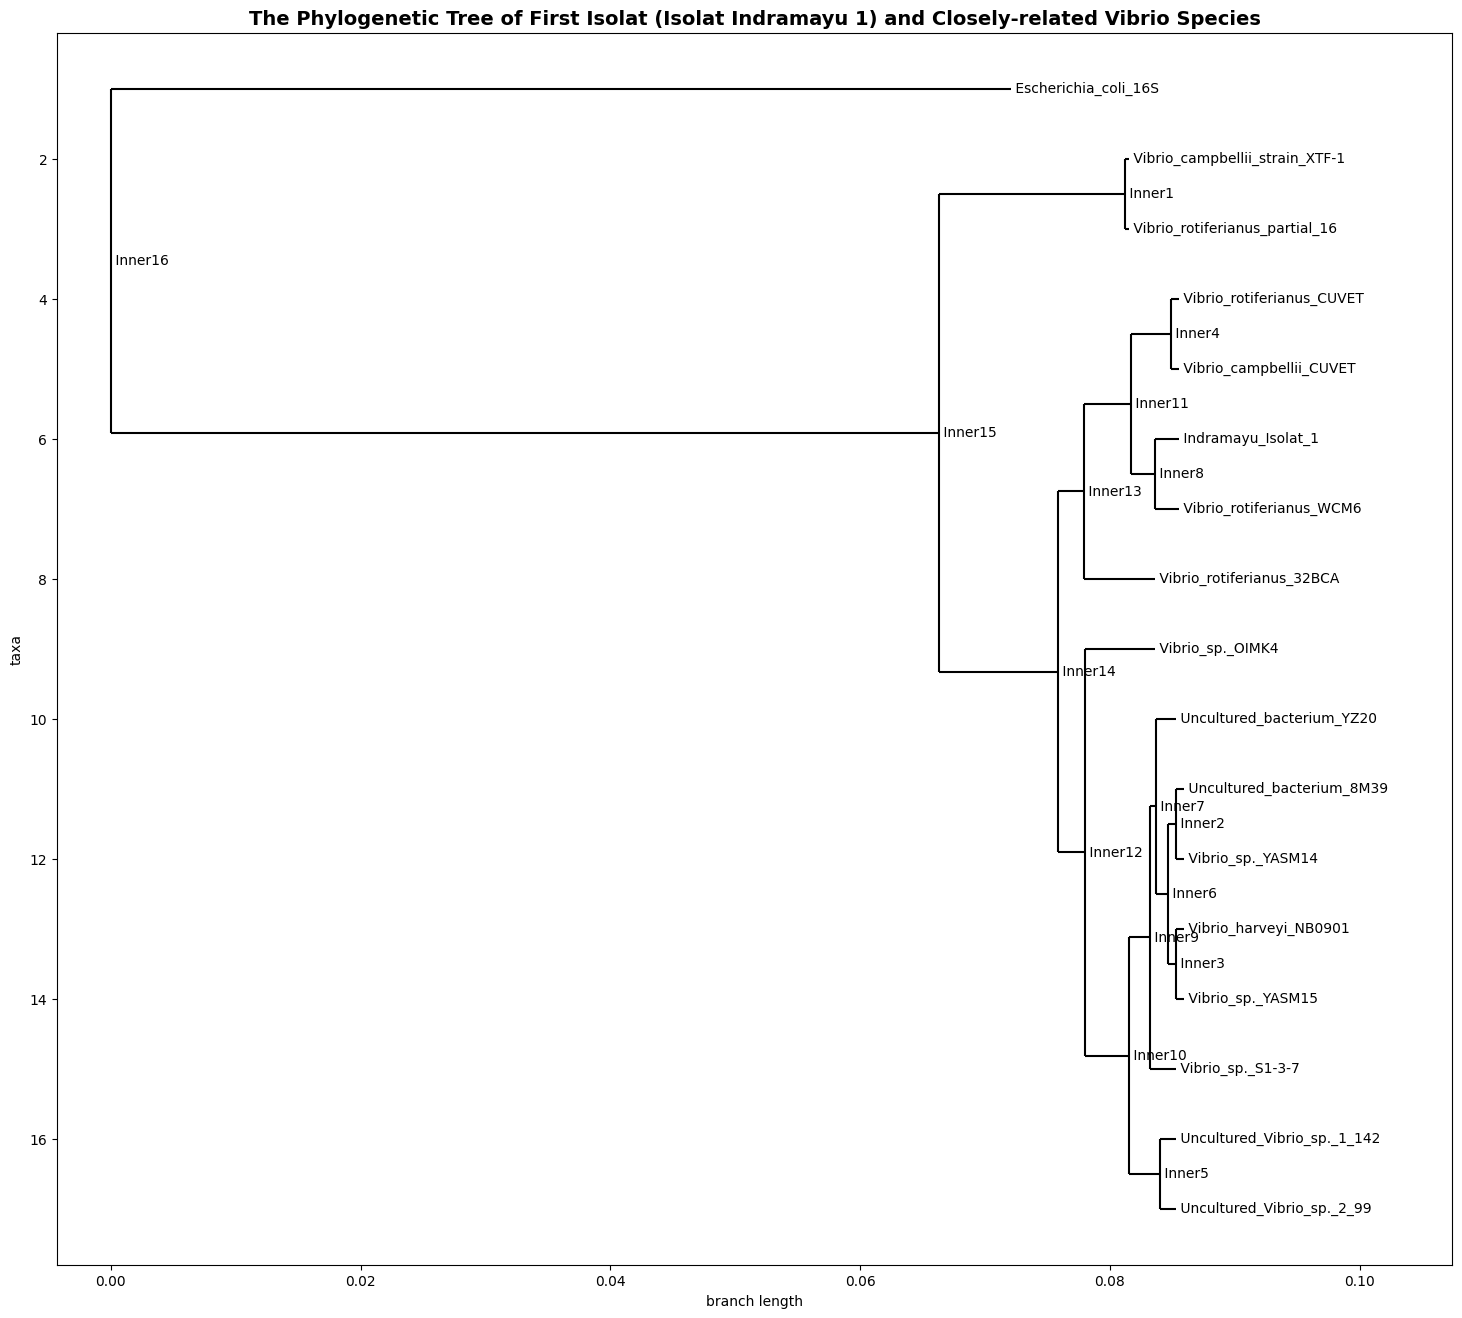

In [17]:
# Visualization with Newick format # First Isolate

# Mapping sequence IDs to species names
for clade in upgma_tree.find_clades():
    if clade.name in id_to_species:
        clade.name = id_to_species[clade.name]

# Saving the tree in Newick format
tree_output_file = "upgma_tree_with_species.newick"
write(upgma_tree, tree_output_file, "newick")
print(f"UPGMA tree saved to {tree_output_file}")

# Setting frame
fig = plt.figure(figsize=(18, 16))
ax = fig.add_subplot(1, 1, 1)

# Phylo.draw() for visualization directly on the axes
Phylo.draw(upgma_tree, do_show=False, axes=ax)
ax.set_title("The Phylogenetic Tree of First Isolat (Isolat Indramayu 1) and Closely-related Vibrio Species", fontsize=14, weight='bold')

# Save the figure as a PNG file
image_output_file = "The Phylogenetic tree of first isolate.png"
plt.savefig(image_output_file, format="png", dpi=300)
print(f"The UPGMA tree image saved to {image_output_file}")

# Display the tree
print(' ')
plt.show()

### **Insights of The Phylogenetic Tree (First Isolate)**

**Insights of clusters in the phylogenetic tree**

Based on visual overview of the phylogenetict tree, it appears that there are 3 distinct clusters and an outgroup. 

**Outgrup**
* Includes: Escherichia_coli_16S
* This species serves as a clear outgroup, showing significant divergence from the Vibrio species. Its separation to Vibrio species helps validating the phylogenetic analysis as Eschericia coli belongs to a different genus.

**Cluster 1: Vibrio rotiferanus group**
*  Includes: Vibrio rotiferianus_partial_16, Vibrio_campbellii_strain_XTF-1, Vibrio_rotiferianus_WCM6, Vibrio_rotiferianus_CUVET, Vibrio_rotiferianus_32BCA and Indramayu Isolate 1.
*  This cluster is mostly dominated by Vibrio rotiferianus species.
*  Indramayu Isolate 1 is closely grouped with Vibrio_rotiferianus_WCM6, showing a very small branch length from it.
*  The Vibrio rotifieranus species and Vibrio Campbellii are often associated with pathogenicity in aquaculture, especially causing vibriosis in shrimp and other marine species.


**Cluster 2: Vibrio harveyi and Related Species**
* Includes: Vibrio_harveyi_NB0901, Vibrio_sp._YASM14, Vibrio_sp._YASM15, Uncultured_bacterium_8M39, and Uncultured_bacterium_YZ20
* This cluster contains Vibrio harveyi, a well documented aquaculture pathogen, causing luminescent vibriosis in shrimp (Austin and Zhang, 2006).
* According to the tree, Vibrio_sp._YASM14 and Vibrio_sp._YASM15 are closely related to Vibrio harveyi.
* Environmental uncultured Vibrio species (8M39 and YZ20) also appear here, possibly an environmental variant or less characterized Vibrio strains.

**Cluster 3: Environmental Vibrio Species**
* Includes: Vibrio_sp._S1-3-7, Uncultured_Vibrio_sp._1_142, Uncultured_Vibrio_sp._2_99
* This cluster contains uncultured Vibrio species and environmental isolates.
* These species may have less pathogenic potential compared to the first two clusters but could still play roles in opportunistic infections.

**Insights of Relationship - Indramayu isolate 1 and other Vibrio Species**
* The Indramayu Isolate I is closest to the Vibrio_rotiferianus_WCM6 and this close relationship places the isolate in the cluster 1. This also suggests a stronger evolutionary ties to this Vibrio rotiferianus strains.
* Moreover, Its position within Cluster 1 implies that the Indramayu isolate 1 may have pathogenic potential, as Vibrio rotiferianus species are known pathogens in aquaculture.

### **Second Isolate Phylogenetic Tree Construction & Visualization** 

**Sequence collection and setting an outgroup (Second isolate)**

The closely-related sequences (with high percent identity and very low e-values) with the second isolate were selected and downloaded using Biopython's Entrez module.


In [18]:
# Sequences collection for Phylogenetic tree # Second isolate
# Downloading sequences from NCBI and placing all in FASTA format

from Bio import Entrez, SeqIO

# Set corresponding email for NCBI Entrez
Entrez.email = "harishmuh@gmail.com"

# List of accession numbers from the BLAST results 
accession_numbers = [
    'FM957464.1', 'MH169314.1', 'FM957469.1', 'OM988202.1', 'DQ269050.1',
    'MH169291.1', 'AF246980.1', 'MH820372.1', 'HE584790.1', 'KC777293.1',
    'KF179672.1', 'FM957468.1', 'FM957472.1', 'FM957467.1', 'PP814965.1',
    'KF179720.1', 'JF836185.1', 'JF836182.1', 'KF179688.1', 'KX431293.1',
    'AY911396.1', 'ON566023.1', 'OM988208.1',
    "AF511430.1" # outgroup E. coli
]

# Output file to save the downloaded sequences in FASTA format
output_file = "multi_sequences_TB03_contig.fasta"

# Open a file to save the sequences
with open(output_file, "w") as fasta_file:
    for accession in accession_numbers:
        try:
            # Fetch the sequence from NCBI
            print(f"Fetching {accession}...")
            handle = Entrez.efetch(db="nucleotide", id=accession, rettype="fasta", retmode="text")
            seq_data = handle.read()
            handle.close()

            # Write the sequence to the output file
            fasta_file.write(seq_data)
        except Exception as e:
            print(f"Error fetching {accession}: {e}")
    # Add the contigs to the same file
    try:
        contig_file_2 = "TB03_contig_1.contigs"  # Contig file
        contigs_2 = list(SeqIO.parse(contig_file_2, "fasta"))
        print(f"Adding contigs from {contig_file_2}...")
        SeqIO.write(contigs_2, fasta_file, "fasta")
    except Exception as e:
        print(f"Error adding contigs: {e}")

print(f"All sequences have been saved to {output_file}.")

Fetching FM957464.1...
Fetching MH169314.1...
Fetching FM957469.1...
Fetching OM988202.1...
Fetching DQ269050.1...
Fetching MH169291.1...
Fetching AF246980.1...
Fetching MH820372.1...
Fetching HE584790.1...
Fetching KC777293.1...
Fetching KF179672.1...
Fetching FM957468.1...
Fetching FM957472.1...
Fetching FM957467.1...
Fetching PP814965.1...
Fetching KF179720.1...
Fetching JF836185.1...
Fetching JF836182.1...
Fetching KF179688.1...
Fetching KX431293.1...
Fetching AY911396.1...
Fetching ON566023.1...
Fetching OM988208.1...
Fetching AF511430.1...
Adding contigs from TB03_contig_1.contigs...
All sequences have been saved to multi_sequences_TB03_contig.fasta.


In [19]:
# Placing names instead of gene id by mapping process # Second isolate
# Mapping species name into the accessions ID
id_to_species_2 = {
    'FM957464.1': 'Vibrio_sp._MY-2008-U5',
    'MH169314.1': 'Vibrio_sp._WAB2255',
    'FM957469.1': 'Vibrio_sp._MY-2008-U27',
    'OM988202.1': 'Vibrio_owensii_NBVo-Mr1',
    'DQ269050.1': 'Uncultured_gamma proteobacterium UA07',
    'MH169291.1': 'Vibrio_sp._WAB2220',
    'AF246980.1': 'Vibrio_sp._99-806',
    'MH820372.1': 'Vibrio_sp._HD-1',
    'HE584790.1': 'Vibrio_owensii isolate AP55',
    'KC777293.1': 'Vibrio_sp._W-13',
    'KF179672.1': 'Uncultured_bacterium_MAY6C18',
    'FM957468.1': 'Vibrio_sp._MY-2008-U24',
    'FM957472.1': 'Vibrio_sp._MY-2008-32d',
    'FM957467.1': 'Vibrio_sp._MY-2008-U9',
    'PP814965.1': 'Vibrio_owensii_GISD-4 MA',
    'KF179720.1': 'Uncultured_bacterium MAY8C3',
    'JF836185.1': 'Vibrio_communis_J821',
    'JF836182.1': 'Vibrio_communis_F052',
    'KF179688.1': 'Uncultured_bacterium_MAY6C41',
    'KX431293.1': 'Uncultured_bacterium_2-21',
    'AY911396.1': 'Vibrio_harveyi_SW-3',
    'ON566023.1': 'Vibrio_sp._TPDS',
    'OM988208.1': 'Vibrio_harveyi_NBVh-Sp2',
    'AF511430.1': 'Escherichia_coli_16S',
    'TB03_contig_1': 'Indramayu_Isolat_2'
}

In [20]:
# Placing species name into accession ID and creating fasta file
# Load sequences from your original FASTA file
input_file = "multi_sequences_TB03_contig.fasta" 
output_file = "multi_sequences_TB03_contig_with_species.fasta"

# Modify the sequence IDs and save to a new file
with open(output_file, "w") as out_fasta:
    for record in SeqIO.parse(input_file, "fasta"):
        # Replace the sequence ID with species name if found in the dictionary
        if record.id in id_to_species_2:
            id_number = record.id 
            full_species_name = id_to_species_2[record.id]
            record.id = full_species_name          # For use as the primary ID
            record.name = full_species_name        # For the name attribute
            record.description = ""                # Clear any additional description
        SeqIO.write(record, out_fasta, "fasta")

**Preprocessing: Multiple Alignment (Second isolate)**

In [21]:
# Perform alignment using ClustalW2 
subprocess.run(["clustalw2", "-INFILE=multi_sequences_TB03_contig_with_species.fasta", "-ALIGN", "-OUTFILE=multi_sequences_TB03_contig.aln"])

# Load the CLUSTAL alignment # Produce 'file format.aln'
alignment2 = AlignIO.read("multi_sequences_TB03_contig.aln", "clustal")

In [22]:
# Write alignment and convert the alignment to FASTA format
AlignIO.write(alignment2, "aligned_sequences_TB03_contig.fasta", "fasta")
second_alignment_file = r"aligned_sequences_TB03_contig.fasta" # The converted FASTA alignment file

In [23]:
# Load sequences from your original FASTA file
input_file = second_alignment_file
output_file = "sequences_with_species2.fasta"

# Modify the sequence IDs and save to a new file
with open(output_file, "w") as out_fasta:
    for record in SeqIO.parse(input_file, "fasta"):
        # Replace the sequence ID with species name if found in the dictionary
        if record.id in id_to_species:
            id_number = record.id 
            full_species_name = id_to_species[record.id]
            record.id = full_species_name          # For use as the primary ID
            record.name = full_species_name        # For the name attribute
            record.description = ""                # Clear any additional description
        SeqIO.write(record, out_fasta, "fasta")

**Calculating distance matrix (Second isolate)**

In [24]:
# Setting mapping, loading alignment, and calculate distance matrix # second Isolate

# Define the mapping from accession IDs to species/strain names
# Mapping species name into the accessions ID
id_to_species2 = {
    'FM957464.1': 'Vibrio_sp._MY-2008-U5',
    'MH169314.1': 'Vibrio_sp._WAB2255',
    'FM957469.1': 'Vibrio_sp._MY-2008-U27',
    'OM988202.1': 'Vibrio_owensii_NBVo-Mr1',
    'DQ269050.1': 'Uncultured_gamma proteobacterium UA07',
    'MH169291.1': 'Vibrio_sp._WAB2220',
    'AF246980.1': 'Vibrio_sp._99-806',
    'MH820372.1': 'Vibrio_sp._HD-1',
    'HE584790.1': 'Vibrio_owensii isolate AP55',
    'KC777293.1': 'Vibrio_sp._W-13',
    'KF179672.1': 'Uncultured_bacterium_MAY6C18',
    'FM957468.1': 'Vibrio_sp._MY-2008-U24',
    'FM957472.1': 'Vibrio_sp._MY-2008-32d',
    'FM957467.1': 'Vibrio_sp._MY-2008-U9',
    'PP814965.1': 'Vibrio_owensii_GISD-4 MA',
    'KF179720.1': 'Uncultured_bacterium MAY8C3',
    'JF836185.1': 'Vibrio_communis_J821',
    'JF836182.1': 'Vibrio_communis_F052',
    'KF179688.1': 'Uncultured_bacterium_MAY6C41',
    'KX431293.1': 'Uncultured_bacterium_2-21',
    'AY911396.1': 'Vibrio_harveyi_SW-3',
    'ON566023.1': 'Vibrio_sp._TPDS',
    'OM988208.1': 'Vibrio_harveyi_NBVh-Sp2',
    'AF511430.1': 'Escherichia_coli_16S',
    'TB03_contig_1': 'Indramayu_Isolat_2'
}

# Load the alignment file
alignment_2 = AlignIO.read(second_alignment_file, "fasta")  # Ensure the file in as aligned object  

# Computing the distance matrix
second_calculator = DistanceCalculator("identity")  # Using 'identity' model
distance_matrix2 = second_calculator.get_distance(alignment_2)
print("Distance Matrix:")
print(distance_matrix2)

Distance Matrix:
Vibrio_sp._WAB2255  0.000000
Vibrio_owensii_GISD-4   0.020130    0.000000
Vibrio_sp._WAB2220  0.001299    0.020779    0.000000
Vibrio_sp._99-806   0.020779    0.027922    0.019481    0.000000
Vibrio_sp._W-13 0.006494    0.025325    0.006494    0.025974    0.000000
Indramayu_Isolat_2  0.022078    0.025974    0.022727    0.042208    0.025974    0.000000
Vibrio_owensii  0.001948    0.020779    0.001948    0.021429    0.005844    0.022727    0.000000
Vibrio_communis_F052    0.003896    0.022727    0.004545    0.024026    0.005195    0.024675    0.003247    0.000000
Uncultured_bacterium_MAY6C41    0.002597    0.021429    0.003247    0.022727    0.007792    0.023377    0.003247    0.005195    0.000000
Vibrio_sp._MY-2008-U5   0.025325    0.010390    0.025974    0.022727    0.030519    0.029221    0.025974    0.027922    0.026623    0.000000
Uncultured_gamma    0.018831    0.005844    0.018831    0.022727    0.024675    0.025974    0.020130    0.022078    0.020779    0.007143 

**Constructing the UPGMA Tree (Second isolate)**

In [25]:
# Constructing the UPGMA tree # Second isolate
second_constructor = DistanceTreeConstructor(second_calculator, "upgma")
second_upgma_tree = second_constructor.build_tree(alignment_2)
print("Second UPGMA Tree:")
print(second_upgma_tree)

Second UPGMA Tree:
Tree(rooted=True)
    Clade(branch_length=0, name='Inner24')
        Clade(branch_length=0.06354821935876624, name='Escherichia_coli_16S')
        Clade(branch_length=0.051098949878246765, name='Inner23')
            Clade(branch_length=0.003939554288789834, name='Inner21')
                Clade(branch_length=0.011629971590909081, name='Vibrio_sp._99-806')
                Clade(branch_length=0.0061840503246753265, name='Inner20')
                    Clade(branch_length=0.005445921266233755, name='Vibrio_sp._TPDS')
                    Clade(branch_length=0.002523843344155818, name='Inner19')
                        Clade(branch_length=0.003566355519480524, name='Inner16')
                            Clade(branch_length=0.001709618506493513, name='Inner10')
                                Clade(branch_length=0.00032467532467533866, name='Inner6')
                                    Clade(branch_length=0.0, name='Inner5')
                                        Clade(br

UPGMA tree saved to second_upgma_tree_with_species.newick
The UPGMA tree image saved to The Phylogenetic tree of second isolate.png
 


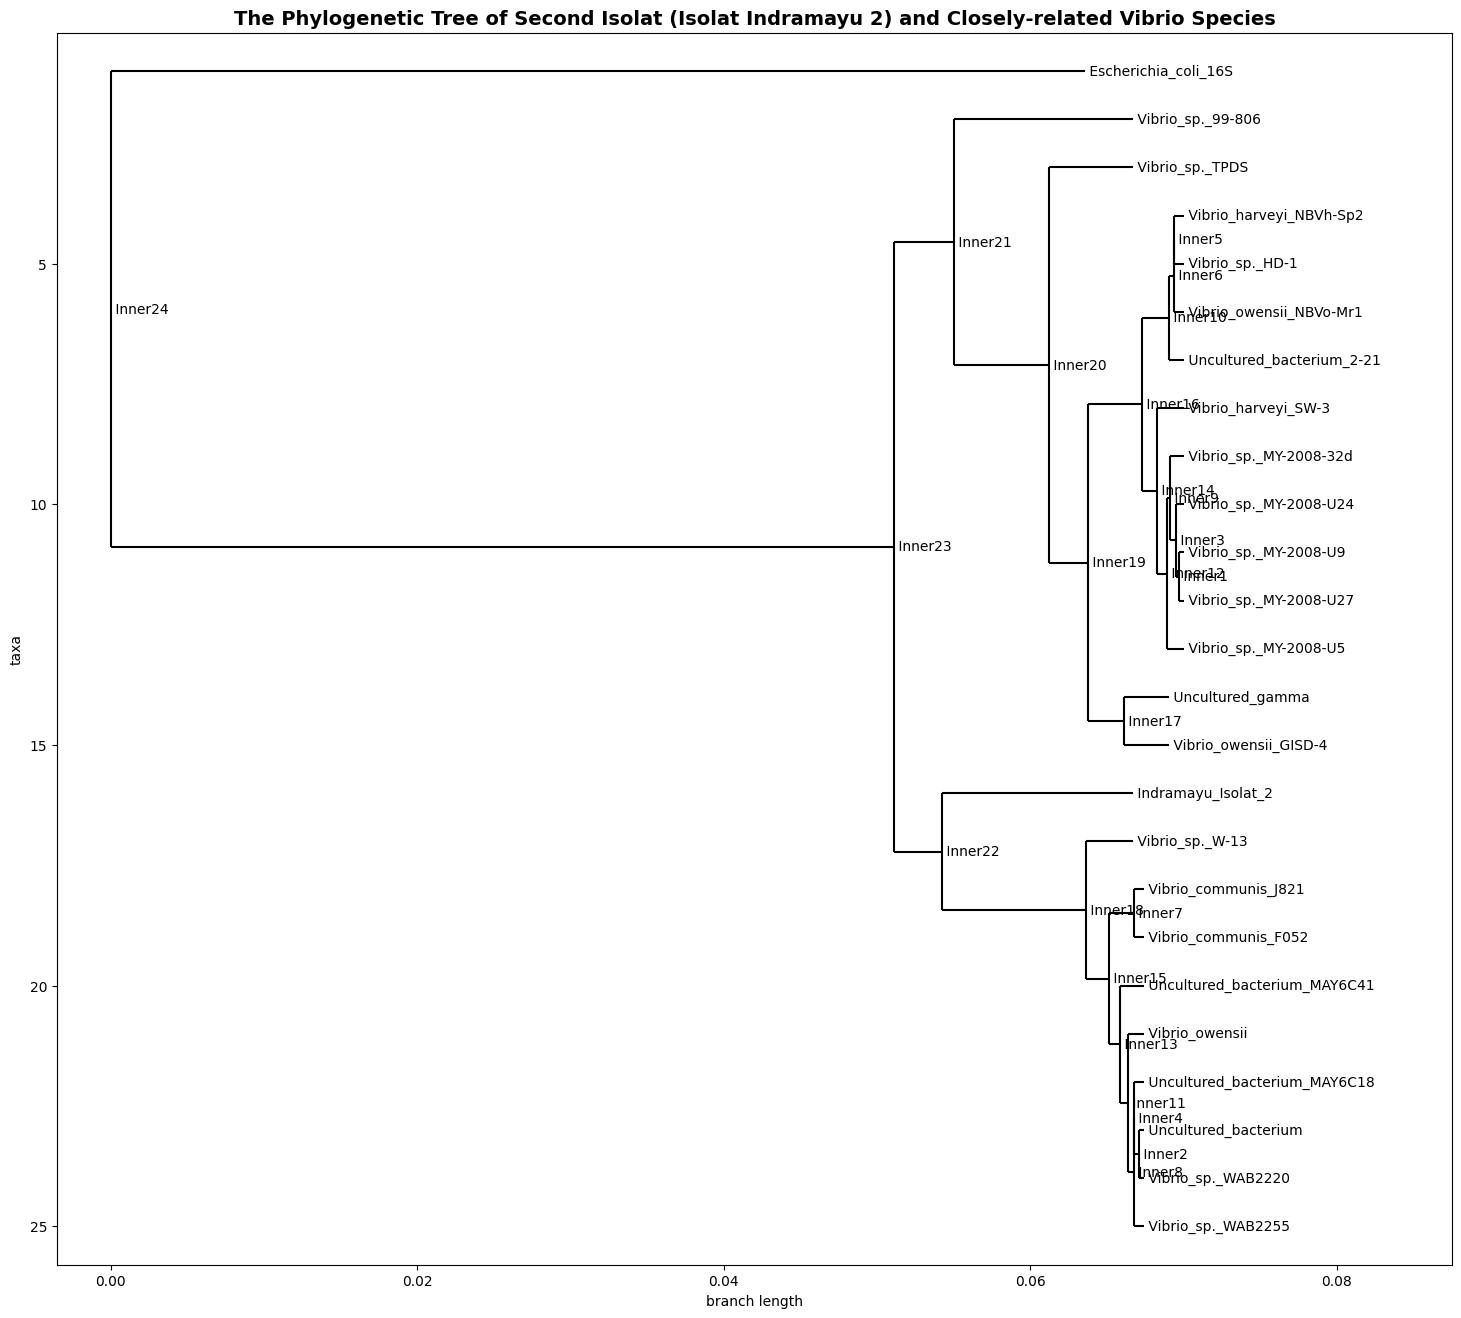

In [26]:
# Visualization with Newick format # Second Isolate

# Mapping sequence IDs to species names
for clade in second_upgma_tree.find_clades():
    if clade.name in id_to_species2:
        clade.name = id_to_species2[clade.name]

# Saving the tree in Newick format
second_tree_output_file = "second_upgma_tree_with_species.newick"
write(second_upgma_tree, second_tree_output_file, "newick")
print(f"UPGMA tree saved to {second_tree_output_file}")

# Setting frame
fig = plt.figure(figsize=(18, 16))
ax = fig.add_subplot(1, 1, 1)

# Phylo.draw() for visualization directly on the axes
Phylo.draw(second_upgma_tree, do_show=False, axes=ax)
ax.set_title("The Phylogenetic Tree of Second Isolat (Isolat Indramayu 2) and Closely-related Vibrio Species", fontsize=14, weight='bold')

# Save the figure as a PNG file
image_output_file_2 = "The Phylogenetic tree of second isolate.png"
plt.savefig(image_output_file, format="png", dpi=300)
print(f"The UPGMA tree image saved to {image_output_file_2}")

# Display the tree
print(' ')
plt.show()

### **Insights of The Phylogenetic Tree (Second Isolate)**

**Insight of clusters** 

According to the second isolate phylogenetic tree, Its appear there are at least 4 clusters and outgrup.

**Outgroup**
* Includes: Escherichia_coli_16S
* This species is distinct that clearly represent it position as outgroup, with longer branch lengths separating it from Vibrio species, as expected due to its taxonomic difference.


**Cluster 1: Vibrio Cluster, Pathogenic subgroup 1 (inner 6)**
* Includes: Vibrio harveyi NBVh-Sp2, Vibrio sp. HD-1, Vibrio owensii NBVo-Mr1
* Beside well documented pathogenic Vibrio harveyi, Vibrio owensii is known for its pathogenic potential in marine organisms (Isnansetyo et al, 2022) 
* They may share ecological roles or pathogenic traits relevant to aquaculture, such as causing disease outbreaks in shrimp farming.
* The close relationship suggests they might have diverged recently or share a common habitat.

**Cluster 2: Vibrio Cluster, Pathogenic subgroup 2 (inner 14)**
* Includes: Vibrio harveyi SW-3, Vibrio sp. MY-2008-32d, Vibrio sp. MY-2008-U24, Vibrio sp. MY-2008-U9, Vibrio sp. MY-2008-U27
* This cluster could represent a subgroup with specific adaptations or pathogenic factor as well for aquaculture species as this contains Vibrio harveyi.

**Cluster 3: Environmental vibrio (Inner 22)**
* Includes: Indramayu Isolate 2, Vibrio sp. W-13, Vibrio communis J821, Vibrio communis F052, Uncultured bacterium MAY6C41
* This group, including Indramayu Isolate 2, seems more environmentally adapted to the specific location.
* Potentially has role pond microbiomes and nutrient cycle.

**Cluster 4: Distict Gamma Group (inner 17)**
* Includes: Uncultured gamma, Vibrio owensii GISD-4
* This cluster's branch lengths suggest genetic divergence from other Vibrio species (Cluster 2), hinting at unique ecological or evolutionary pathways.


**Insights of Relationship - Indramayu isolate 2 and other Vibrio Species**
* Indramayu Isolate 2 clusters within an environmentally adapted group, grouped in a cluster with other Vibrio species (Vibrio communis and Vibrio sp. W-13), indicating a shared evolutionary origin or genetic similarity. This grouping suggests these species may share common ecological roles or genetic traits, such as environmental adaptation or metabolic pathways.
* While Vibrio communis and Vibrio sp. W-13 are not among the commonly studied highly pathogenic species in shrimp or other marine hosts and the Indramayu Isolate 2 does not group inside with the highly pathogen Vibrio harveyi, the location of Indramayu Isolate 2 in the UPGMA tree that near pathogenic Vibrio (e.g, Vibrioi owensii) might have some pathogenic potential.
* Alternatively, Indramayu Isolate 2 could be a commensal species or play a role in nutrient cycling in the shrimp pond ecosystem.
* However, It may act as an opportunistic pathogen as well, causing disease when environmental or host conditions are compromised (e.g., poor water quality, high organic load).



## **Conclusion and Recommendation**

### **Conclusion**

This study investigated the genetic identification, phylogenetic relationship, and potential pathogenicity of two Vibrio isolates obtained from shrimp pond water in Indramayu, Indonesia, using 16S rRNA sequencing, BLAST analysis, and phylogenetic tree construction.

**BLAST Analysis**
* **First Isolate**

  * MEGABLAST results revealed a very high similarity (99.93% identity) to Vibrio sp. YASM14 and Vibrio rotiferianus strain 32BCA. These species are known to be associated with aquaculture environments and may have pathogenic potential.
* **Second Isolate**

  * The closest match was Vibrio sp. MY-2008-U5 with 100% identity and 97.61% query coverage. Other matches included Vibrio harveyi and Vibrio owensii, both of which are known aquaculture pathogens.

**Phylogenetic Tree Analysis**

* **First Isolate**

  * Indramayu Isolate 1 clustered closely with Vibrio rotiferianus WCM6 in a group dominated by V. rotiferianus species, suggesting strong evolutionary ties and potential pathogenicity similar to known vibriosis-causing species.
* **Second Isolate**
  * Indramayu Isolate 2 grouped with Vibrio communis and Vibrio sp. W-13, indicating an environmentally adapted cluster. Despite its non-association with highly pathogenic strains, its proximity to Vibrio owensii suggests it could have opportunistic pathogenic traits under unfavorable conditions.

**Potential Pathogenicity for Aquaculture**

* **First Isolate**

  * The close association with V. rotiferianus species, known for causing shrimp vibriosis, strongly indicates pathogenic potential.
* **Second Isolate**

  * Though part of an environmentally adapted cluster, its similarity to Vibrio communis and proximity to pathogenic Vibrio owensii raise concerns about its opportunistic pathogenicity, especially in stressed aquaculture environments.

### **Recommendation**

**Monitoring and Management**

* Regular monitoring of shrimp ponds for Vibrio species, including both isolates, to detect early signs of potential outbreaks.
* Improve water quality management to prevent opportunistic infections by reducing organic loads and environmental stressors.

**Further Research**

* Perform virulence factor testing and experimental infections to confirm the pathogenicity of Indramayu Isolates 1 and 2.
* Conduct whole-genome sequencing to identify genes linked to pathogenicity (eg., Virulence gen PirA, PirB) and antibiotic resistance.


## **References**

* Aguilera-Rivera, D., Prieto-Davó, A., Rodríguez-Fuentes, G., Escalante-Herrera, K. S., & Gaxiola, G. (2019). A vibriosis outbreak in the Pacific white shrimp, Litopenaeus vannamei, reared in biofloc and clear seawater. Journal of Invertebrate Pathology, 167, Article 107249.
* Austin, B., & Zhang, X. H. (2006). Vibrio harveyi: A significant pathogen of marine vertebrates and invertebrates. Letters in Applied Microbiology, 43(2), 119–124. 
* Cock PJ, Antao T, Chang JT, Chapman BA, Cox CJ, Dalke A, Friedberg I, Hamelryck T, Kauff F, Wilczynski B, and de Hoon MJL (2009). Biopython: freely available Python tools for computational molecular biology and bioinformatics. Bioinformatics, 25, 1422-1423.
* De Schryver, P., Defoirdt, T., & Sorgeloos, P. (2014). Early mortality syndrome outbreaks: A new paradigm in shrimp farming? Reviews in Aquaculture, 6(4), 227-237.
* Isnansetyo, A., Istiqomah, I., Anshary, H., Sriwulan, S., Yudiati, E., Subagiyo, S., Arif, A., & Kartikasari, D. W. (2022). Identification and antibiotic-resistant properties of Vibrio owensii and V. alginolyticus isolated from the Spermonde Islands, Indonesia. Biodiversitas, 23(11), 5995–6005.
* Soto-Rodriguez, S. A., et al. (2015). Virulence of Vibrio species isolated from diseased shrimp. Aquaculture, 448, 52-58.
* Thompson, F. L., Iida, T., & Swings, J. (2004). Biodiversity of Vibrios. Microbiology and Molecular Biology Reviews, 68(3), 403-431.
